In [29]:
import sys #acceder a las propiedades de mi maquina y mi sistema
print("Python: {}".format(sys.version))
import scipy 
print('Scipy: {}'.format(scipy.__version__))
import numpy 
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Scipy: 1.3.0
Numpy: 1.16.3
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.21.2


In [0]:
#dataset
import pandas
from pandas.plotting import scatter_matrix
pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
#hacer el split del modelo
from sklearn import model_selection
#tecnicas de evaluación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#models/algorhitms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
DATASET_ATTRIBUTES = ['url', 'title', 'category','num-category', 'reported', 'illegal', 'malicious', 'length','uppercase','digits','consonants','vowels','sum','concat']
dataset = pandas.read_csv("redes.csv", names=DATASET_ATTRIBUTES)
dataset.head(200)

,url,title,category,num-category,reported,illegal,malicious,length,uppercase,digits,consonants,vowels,sum,concat
0,haystakvxad7wbk5,Haystak,buscador,1,0,0,0,16,0,0.125000,0.687500,0.187500,1624,104971211151169710711812097100551199810753
1,3g2upl4pq6kufc4m,DuckDuckGo,buscador,1,0,0,0,16,0,0.312500,0.562500,0.125000,1458,511035011711210852112113541071171029952109
2,5plvrsgydwy2sgce,Searx,buscador,1,0,0,0,16,0,0.125000,0.812500,0.062500,1652,531121081181141151031211001191215011510399101
3,msydqstlz2kzerdg,Not Evil,buscador,1,0,0,0,16,0,0.062500,0.875000,0.062500,1716,10911512110011311511610812250107122101114100103
4,xmh57jrzrnw6insl,Torch,buscador,1,0,0,0,16,0,0.187500,0.750000,0.062500,1618,120109104535510611412211411011954105110115108
5,6tbgusvuzwovvacr3ygn66flaekw5dyigi7fnelxdgdtwx...,List lolita,buscador,1,0,1,0,56,0,0.142857,0.678571,0.178571,5661,5411698103117115118117122119111118118979911451...
6,jh32yv5zgayyyts3,Hiden-Wiki,buscador,1,0,0,0,16,0,0.250000,0.687500,0.062500,1570,1061045150121118531221039712112112111611551
7,torlinkbgs6aabns,TorLinks,buscador,1,0,1,0,16,0,0.062500,0.687500,0.250000,1658,1161111141081051101079810311554979798110115
8,linkdirdgrhkr2zm,Link Dir Onion,buscador,1,0,0,0,16,0,0.062500,0.812500,0.125000,1672,10810511010710010511410010311410410711450122109
9,noscammmjvejh5b4,NoScam,buscador,1,0,0,0,16,0,0.125000,0.687500,0.187500,1597,1101111159997109109109106118101106104539852


In [32]:
#obtener las dimensiones del dataset
rows,cols = dataset.shape
print("{}x{}".format(rows,cols))

129x14


In [33]:
#perfil estadstico de las variables
print(dataset.describe())

       num-category  reported     illegal  malicious      length  uppercase  \
count    129.000000     129.0  129.000000      129.0  129.000000      129.0   
mean       4.782946       0.0    0.426357        0.0   20.348837        0.0   
std        2.455737       0.0    0.496475        0.0   12.512900        0.0   
min        1.000000       0.0    0.000000        0.0   16.000000        0.0   
25%        3.000000       0.0    0.000000        0.0   16.000000        0.0   
50%        4.000000       0.0    0.000000        0.0   16.000000        0.0   
75%        8.000000       0.0    1.000000        0.0   16.000000        0.0   
max        9.000000       0.0    1.000000        0.0   57.000000        0.0   

           digits  consonants      vowels          sum  
count  129.000000  129.000000  129.000000   129.000000  
mean     0.171903    0.654593    0.173504  2015.976744  
std      0.092614    0.117207    0.092489  1224.356186  
min      0.000000    0.312500    0.000000  1263.000000  
25%

In [34]:
print(dataset.groupby('category').size())
print("\n")
print(dataset.groupby('illegal').size())

category
buscador    12
drogas      13
email       13
erotico     16
foros       23
hacking      6
hosting     17
markets     27
murder       2
dtype: int64


illegal
0    74
1    55
dtype: int64


# Visualización

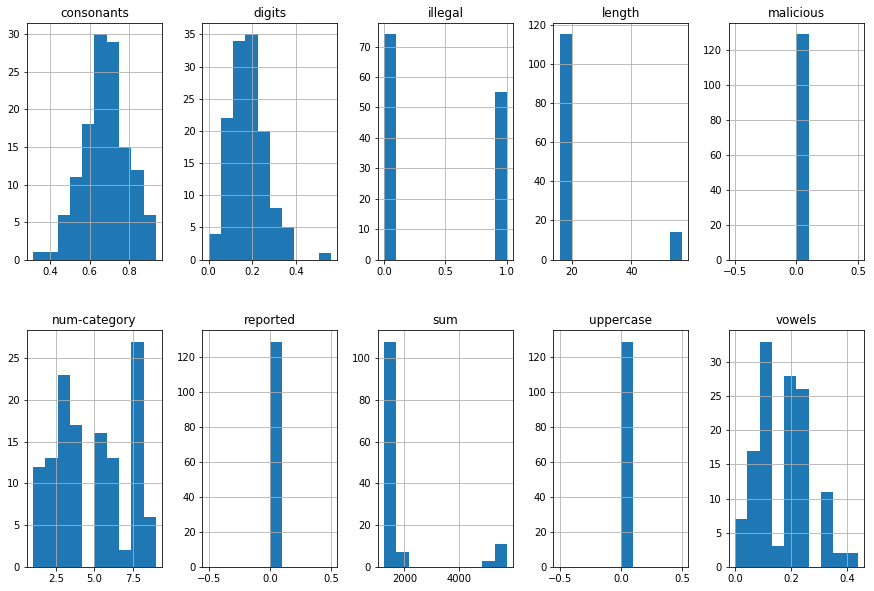

In [35]:
dataset.hist(layout=(2,5), figsize=(15, 10))
plt.show()

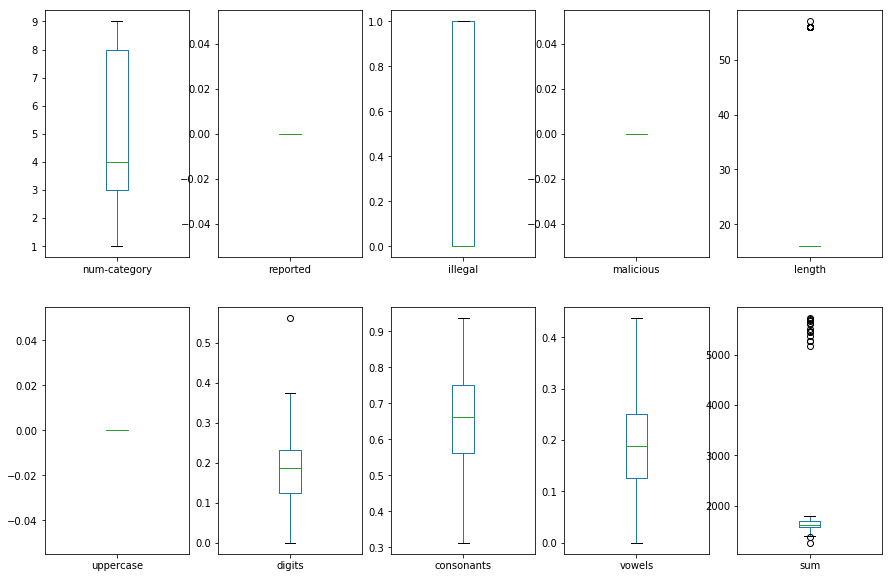

In [36]:
dataset.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, figsize=(15, 10))
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


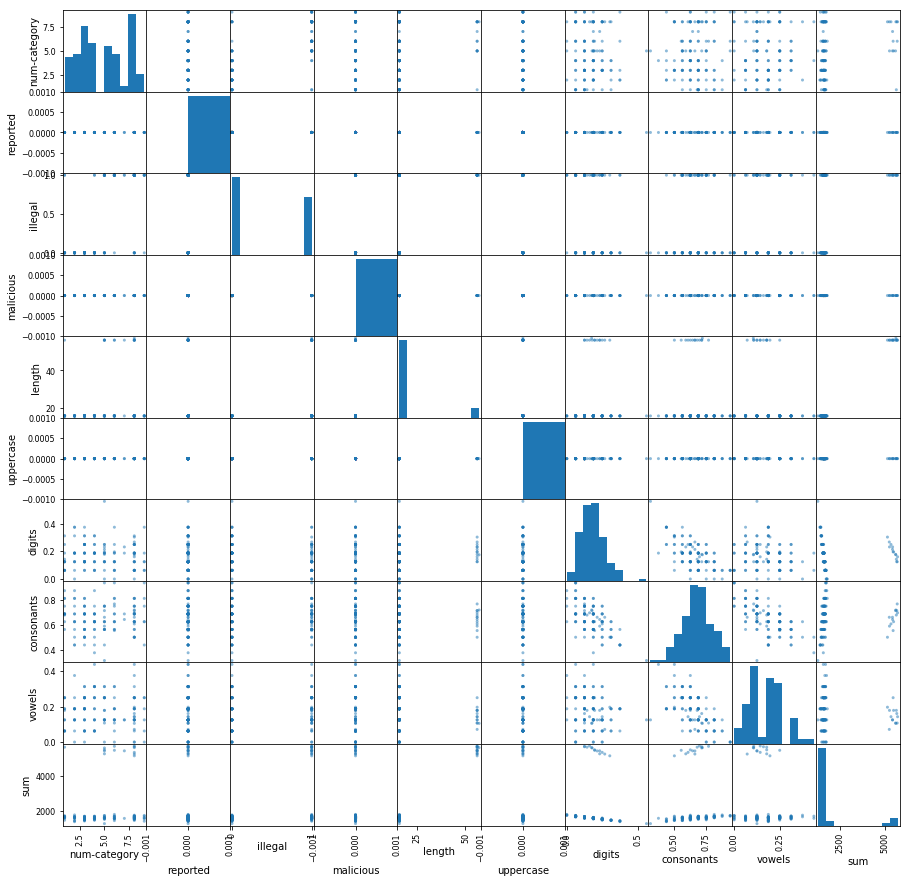

In [51]:
scatter_matrix(dataset, figsize=(15, 15))
plt.show()
# Alertas prque las categorías Uppercase, Malicioso y reportado n tienen variación

# Dispersión

In [0]:
from sklearn.preprocessing import StandardScaler
# DATASET_ATTRIBUTES = ['url', 'title', 'category', 'reported', 'illegal', 'malicious', 'length','uppercase','digits','consonants','vowels']
# features = [ 'length','uppercase','digits','consonants','vowels', 'sum', 'concat']
features = [ 'digits','consonants','vowels', 'sum']
X= dataset.loc[:,features].values
Y = dataset.loc[:,['category', 'reported', 'illegal']].values
#X = StandardScaler().fit_transform(X)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalComponentsAsDataFrame = pandas.DataFrame(data=principalComponents,
                                                  columns = ['principal component 1', 'principal component 2'])
yAsDataFrame = pandas.DataFrame(data=Y, columns = ['category', 'reported', 'illegal'])
finalDf = pandas.concat([principalComponentsAsDataFrame,yAsDataFrame],axis=1)

buscador,#6200ea
email,#64dd17
foros,#d500f9
hosting,#18ffff
erotico,#d50000
drogas,#ff6f00
murder,#3e2723
markets,#ffff00
hacking,#827717
0,#64ffda
1,#c51162


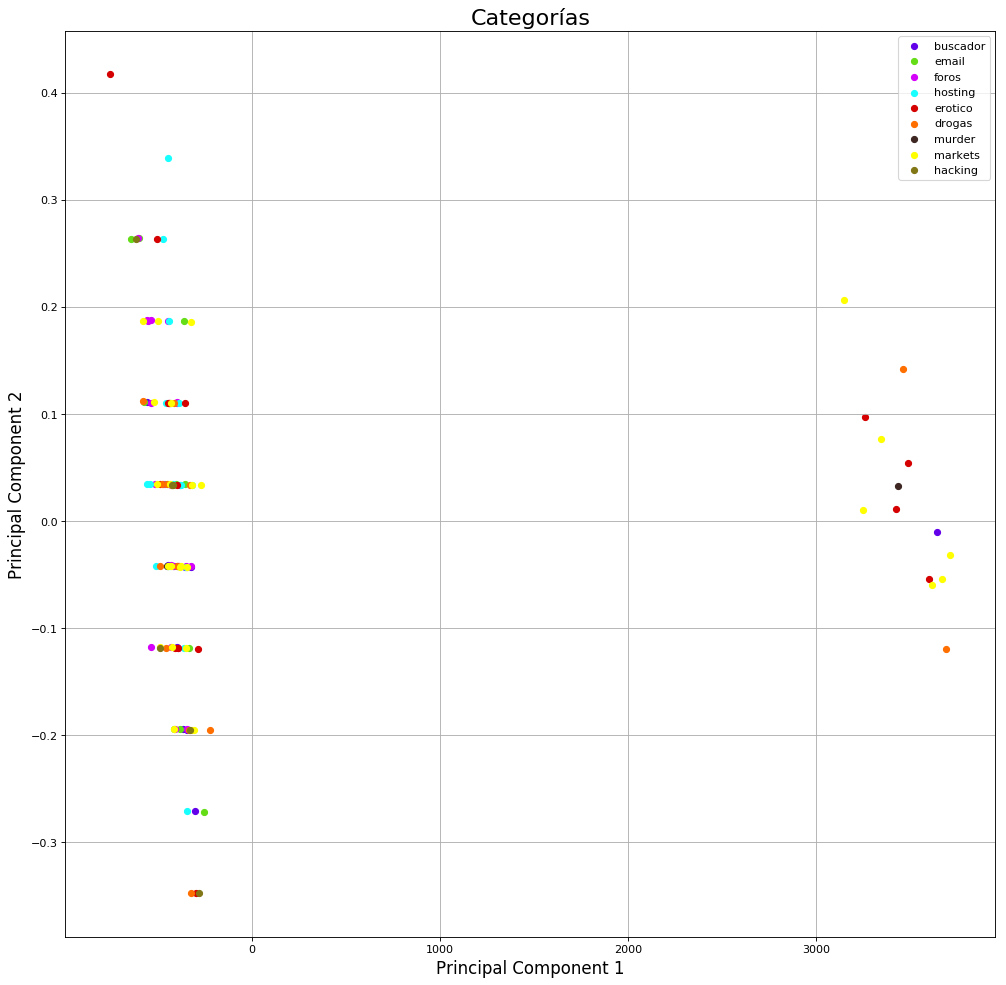

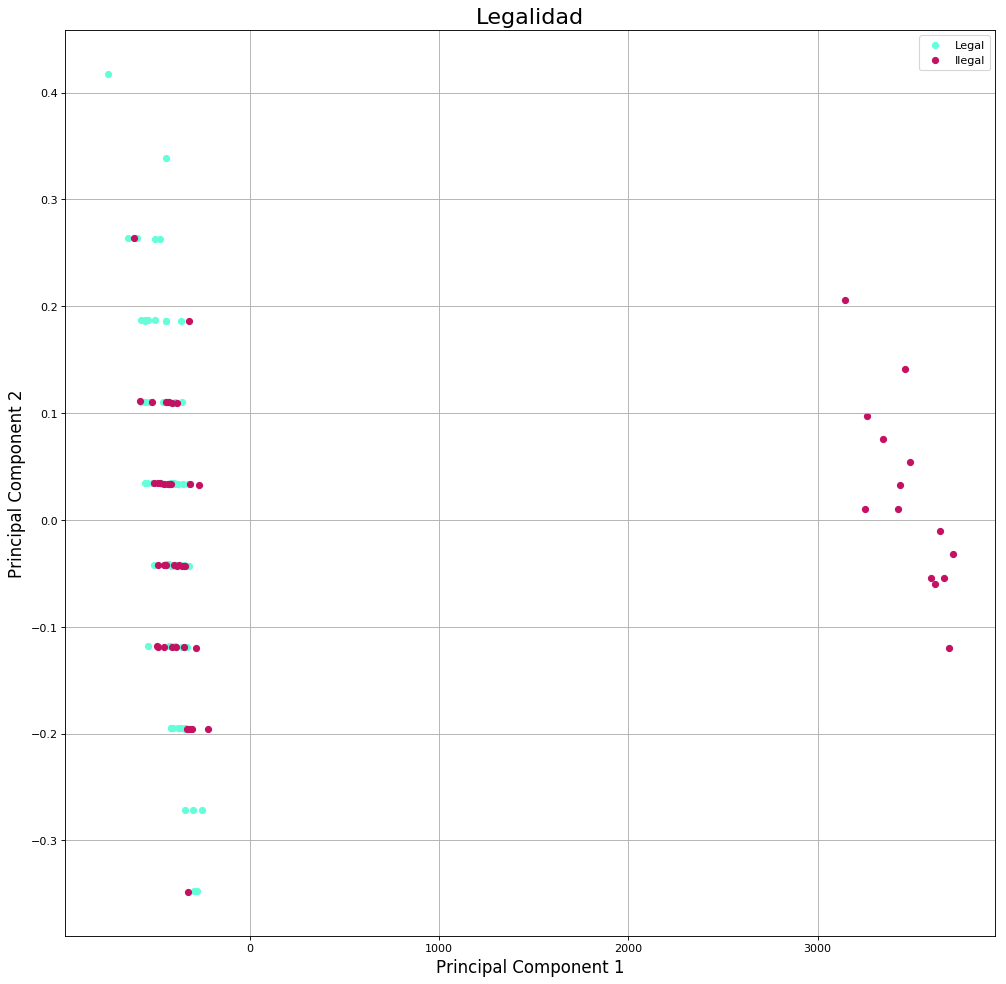

In [54]:
#visualizar resultados
fig = plt.figure(figsize=(15, 15), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Categorías', fontsize = 20)
# Gráfica Categorías
# buscador email foros hosting erotico drogas murder markets
targets = ['buscador','email','foros','hosting','erotico','drogas','murder','markets', 'hacking']
colors = [ "#6200ea", "#64dd17", "#d500f9", "#18ffff", "#d50000", "#ff6f00", "#3e2723", "#ffff00", "#827717" ]
for c, color in zip(targets,colors):
    print("{},{}".format(c, color))
    #get eacho clusters
    indices = finalDf['category'] == c
    ax.scatter(finalDf.loc[indices, 'principal component 1']
               , finalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()



# Gráfica Illegal
# 0 1
fig2 = plt.figure(figsize=(15, 15), dpi=80)
ax2 = fig2.add_subplot(1,1,1)
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('Legalidad', fontsize = 20)

targets2 = [0,1]
colors2 = ["#64ffda", "#c51162" ]
for c, color in zip(targets2,colors2):
    print("{},{}".format(c, color))
    #get eacho clusters
    indices2 = finalDf['illegal'] == c
    ax2.scatter(finalDf.loc[indices2, 'principal component 1']
               , finalDf.loc[indices2, 'principal component 2']
               , c = color
               , s = 30)
ax2.legend(["Legal", "Ilegal"])
ax2.grid()


Modelos


In [0]:
data = dataset.values 
X= data[:,9:13]
Y= data[:,2]
#Yi= data[:,5] #2:category 5:illegal
#f = lambda y: 2*y -1
#Y= numpy.array([f(yi) for yi in Yi])

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
#print(Y_validation)
#print(len(X))
#print(len(Y))

In [49]:
'''
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
'''
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    print(name)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR
LR: 0.250476 (0.094057)
KNN
KNN: 0.203810 (0.072243)
CART
CART: 0.105714 (0.081838)
NB
NB: 0.145238 (0.051376)
SVM
SVM: 0.231429 (0.072989)


In [50]:
# Make predictions on validation dataset
bestModel =  LogisticRegression(solver='lbfgs', multi_class='auto')# SVC()
bestModel.fit(X_train, Y_train)
predictions = bestModel.predict(X_validation)
#print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))

# [ 16, 0, 0.25, 0.625, 0.125, 1542 ] w2y5hx7ffqawun2n,32chan,hosting  legal
# [ 56, 0, 0.19642857142857142, 0.6607142857142857, 0.14285714285714285, 5536 ] z7kd7qwgx2eb3vmrq44iaxa4vwa6wtr2haons3dqj4jrmkxazwtjztqd,Gulfcarteltexas,drogas  ilegal
# [ 56, 0, 0.23214285714285715, 0.6428571428571429, 0.125, 5429 ] 7wxzaxsqibuinpyc3muazc374glv32ve73jw6zf7q6bqtc4mfynsjjyd,Yellow Brick Market,markets ilegal
p = bestModel.predict([[ 0.25, 0.625, 0.125, 1542 ]])
print(p)

['foros']
